In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
design_space_bounds = [(0.0, 35.0), (0.0, 35.0)]
from matplotlib.colors import PowerNorm
import pandas as pd

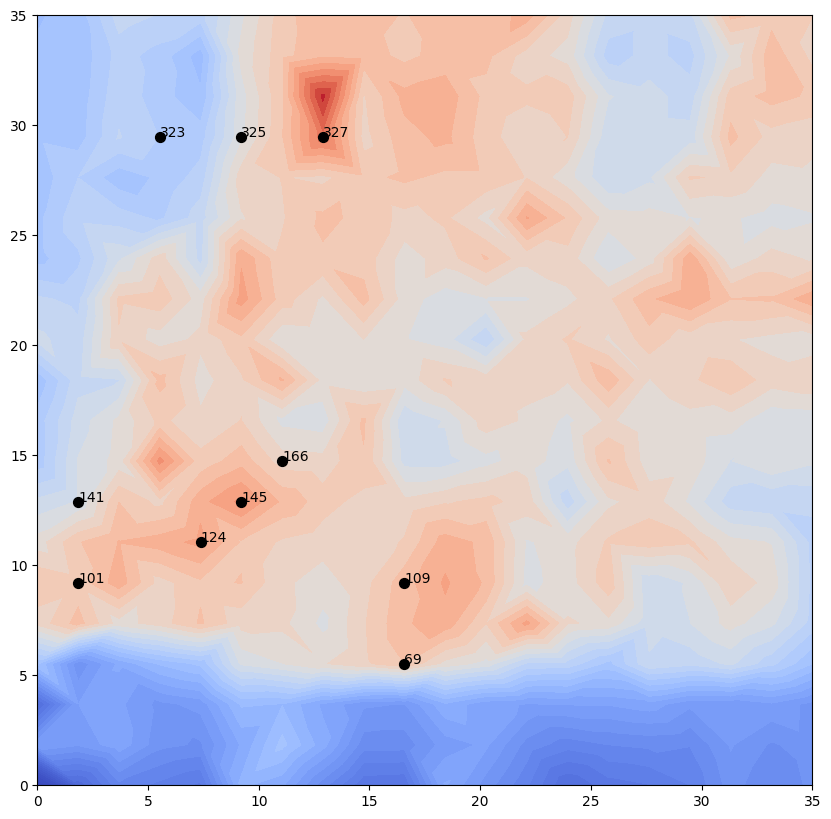

In [2]:
gradient_data = np.load("../paper/data/gradient_data.npz")
grid_data = np.load("../paper/data/grid_data_20.npz")

z = gradient_data["grid_norm"]
grid_comps = grid_data["comps"]
select_ind = [101, 69, 109, 124, 145, 166, 141, 323, 325, 327]
fig, ax = plt.subplots(figsize=(10,10))
z = np.log(z+1e-5)
norm=PowerNorm(gamma=2.2)
cmap = "coolwarm"
contour =  ax.tricontourf(grid_comps[:,0],
                        grid_comps[:,1], 
                        z,
                        levels=50,
                        cmap = cmap,
                        norm = norm,
                        )
ax.scatter(grid_comps[select_ind,0], grid_comps[select_ind,1], s = 50, color="k")
for i in select_ind:
    ax.text(*grid_comps[i,:], i)
plt.show()

## Prepare sample concentrations for 96 Well plate

In [3]:
CTAB = 96
GCH = 59
GS = 24 
comps = grid_comps[select_ind,:]
n_samples = len(comps)
SN = np.round(comps[:,0].reshape(-1,1)).astype(int)
AA = np.round(comps[:,1].reshape(-1,1)).astype(int)
CTAB_ = np.array([CTAB]*n_samples).reshape(-1,1)
GCH_ = np.array([GCH]*n_samples).reshape(-1,1)
GS = np.array([GS]*n_samples).reshape(-1,1)

volumes = np.hstack((CTAB_, GCH_, AA, SN, GS))
WATER = 300 - np.sum(volumes, axis=1).reshape(-1,1)
volumes_ = np.hstack((CTAB_, WATER, GCH_, AA, SN, GS))
volume_df_96 = pd.DataFrame(volumes_, columns=['CTAB', 'Water', 'GCH', 'AA', 'SN', 'GS'])
volume_df_96

,CTAB,Water,GCH,AA,SN,GS
0,96,110,59,9,2,24
1,96,98,59,6,17,24
2,96,95,59,9,17,24
3,96,103,59,11,7,24
4,96,99,59,13,9,24
5,96,95,59,15,11,24
6,96,106,59,13,2,24
7,96,86,59,29,6,24
8,96,83,59,29,9,24
9,96,79,59,29,13,24


## Prepare volumes for 48 well palte

In [4]:
factor = 1300/300
CTAB = factor*96
GCH = factor*59
GS = factor*24 
comps = factor*grid_comps[select_ind,:]
n_samples = len(comps)
SN = np.round(comps[:,0].reshape(-1,1))
AA = np.round(comps[:,1].reshape(-1,1))
CTAB_ = np.array([CTAB]*n_samples).reshape(-1,1)
GCH_ = np.array([GCH]*n_samples).reshape(-1,1)
GS = np.array([GS]*n_samples).reshape(-1,1)

volumes = np.hstack((CTAB_, GCH_, AA, SN, GS))
WATER = 1300 - np.sum(volumes, axis=1).reshape(-1,1)
volumes_ = np.hstack((CTAB_, WATER, GCH_, AA, SN, GS)).round().astype(int)
volume_df_48 = pd.DataFrame(volumes_, columns=['CTAB', 'Water', 'GCH', 'AA', 'SN', 'GS'])
volume_df_48

,CTAB,Water,GCH,AA,SN,GS
0,416,476,256,40,8,104
1,416,428,256,24,72,104
2,416,412,256,40,72,104
3,416,444,256,48,32,104
4,416,428,256,56,40,104
5,416,412,256,64,48,104
6,416,460,256,56,8,104
7,416,372,256,128,24,104
8,416,356,256,128,40,104
9,416,340,256,128,56,104


In [5]:
divmod(72, 20)

(3, 12)

In [5]:
volume_df_96.to_csv('./repeat_96_well_plate.csv',index=False)
volume_df_48.to_csv('./repeat_48_well_plate.csv',index=False)

In [6]:
# Total stock solutions required
(volume_df_96.sum()+volume_df_48.sum())*5

CTAB     25600
Water    25410
GCH      15750
AA        4375
SN        2465
GS        6400
dtype: int64

For implementation:
1. Repeat the synthesis function 5 times over the each data frame. Randmize the order each time so that we can make sure each sample is treated is not subject to any systematic experimental errors.